In [70]:
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
dataset = pd.read_csv('diabetes.csv')

In [72]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

data = dataset.drop('Outcome', axis = 1)
Y = dataset.Outcome
data_prepared = pipeline.fit_transform(data)
data_train, data_test, Y_train, Y_test = train_test_split(data_prepared, Y, test_size = 0.20)

# Linear regression

In [76]:
linearRegressor = LinearRegression()
randomForestRegressor = RandomForestRegressor()
svmRegressor = svm.SVC()
nBRegressor = GaussianNB()
knnRegressor = KNeighborsClassifier()

In [77]:
param_grid = [
    {
        'copy_X': [False], 'fit_intercept': [False]
    }, 
    {
        'fit_intercept': [False]
    }
]
grid_search = GridSearchCV(linearRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_train,Y_train)

grid_search.best_params_

{'copy_X': False, 'fit_intercept': False}

In [78]:
linearRegressor = LinearRegression(copy_X=False, fit_intercept=False)
linearRegressor.fit(data_train, Y_train)
Y_pred = linearRegressor.predict(data_test)

file = open('models/linearRegression.pkl', 'wb')
pickle.dump(linearRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/linearRegressionParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Linear regression прогноз Y:\n", list(Y_pred[:5]))

Y:
 [0, 0, 1, 0, 1]
Linear regression прогноз Y:
 [-0.30164882128819975, -0.35640425631894385, 0.31616335530307055, -0.3318307875635135, 0.38285948880041787]


### Матрица ошибок визуализирует эффективность алгоритма классификации путем сравнения прогнозируемого значения целевой переменной с ее фактическим значением.
### TP - верно спрогнозированные положительные цели.
### FN - фактически положительные цели, которые были спрогнозированы как отрицательные.
### FP - фактически отрицательные цели, которые были спрогнозированы как положительные.
### TN - верно спрогнозированные отрицательные цели.

### Precision - доля объектов, названных классификатором положительными и при этом действительно являющимися положительными.
### Recall - доля объектов положительного класса из всех объектов положительного класса, найденная алгоритмом.
### Accuracy — доля правильных ответов алгоритма.
### F1-score - среднее гармоническое precision и recall.

In [98]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[92 15]
 [21 26]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       107
           1       0.63      0.55      0.59        47

    accuracy                           0.77       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.77      0.76       154



### ROC-кривая - график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак TPR, и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак FPR при варьировании порога решающего правила.
### Количественная интерпретация ROC даёт показатель AUC - площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. Чем выше показатель AUC, тем качественнее классификатор.

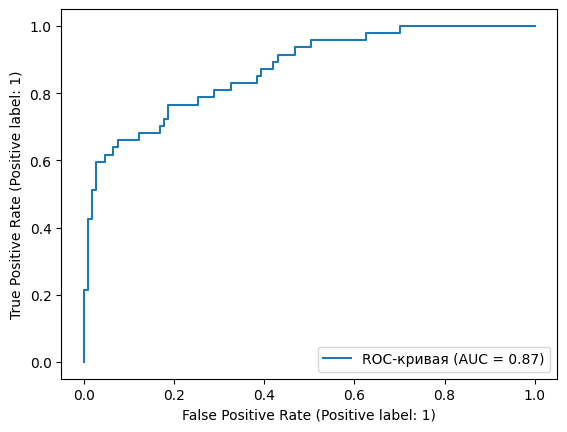

In [80]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

# Random forest

In [81]:
randomForestRegressor.get_params()
param_grid = [
    {
        'n_estimators':[4,15,40], 'max_features':[3,5,8]
    }, 
    {
        'bootstrap':[False],'n_estimators':[4,15,40]  
    }
]
grid_search = GridSearchCV(randomForestRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'max_features': 5, 'n_estimators': 15}

In [97]:
randomForestRegressor = RandomForestRegressor(max_features=5, n_estimators=40)
randomForestRegressor.fit(data_train, Y_train)
Y_pred = randomForestRegressor.predict(data_test)

file = open('models/randomForest.pkl', 'wb')
pickle.dump(randomForestRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/randomForestParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Random forest прогноз Y:\n", list(Y_pred[:5]))

Y:
 [0, 0, 1, 0, 1]
Random forest прогноз Y:
 [0.075, 0.0, 0.775, 0.0, 0.425]


In [83]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[95 12]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



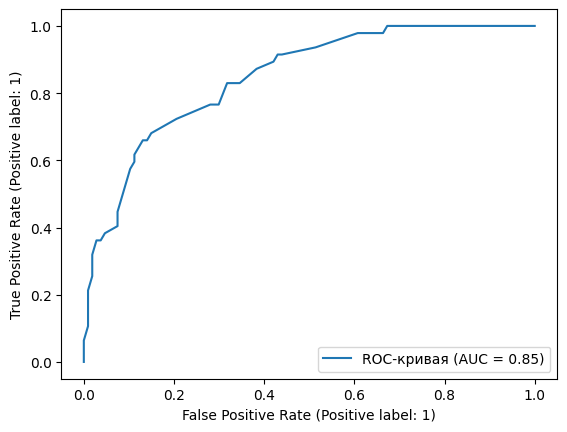

In [84]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

# SVM

In [85]:
svmRegressor.get_params()
param_grid = [
    {
        'C': [1, 10, 100, 1000], 'kernel': ['linear']
    }, 
    {
        'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'] 
    }
]
grid_search = GridSearchCV(svmRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [86]:
svmRegressor = svm.SVC(C=100, gamma=0.001, kernel='rbf')
svmRegressor.fit(data_train, Y_train)
Y_pred = svmRegressor.predict(data_test)

file = open('models/svm.pkl', 'wb')
pickle.dump(svmRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/svmParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("SVM прогноз Y:\n", list(Y_pred[:5]))

Y:
 [0, 0, 1, 0, 1]
SVM прогноз Y:
 [0, 0, 1, 0, 1]


In [87]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[100   7]
 [ 18  29]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       107
           1       0.81      0.62      0.70        47

    accuracy                           0.84       154
   macro avg       0.83      0.78      0.79       154
weighted avg       0.83      0.84      0.83       154



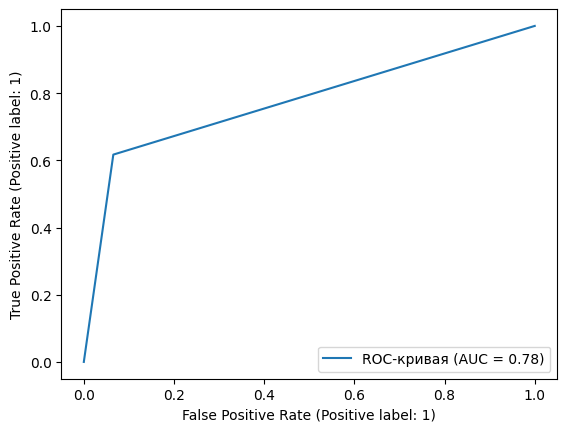

In [88]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

# Naive Bayes

In [89]:
nBRegressor.get_params()
param_grid = [
    {
        'var_smoothing':[0.00000001, 0.000001, 0.001]
    } 
]
grid_search = GridSearchCV(nBRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'var_smoothing': 1e-08}

In [90]:
nBRegressor = GaussianNB(var_smoothing=1e-08)
nBRegressor.fit(data_train, Y_train)
Y_pred = nBRegressor.predict(data_test)

file = open('models/nb.pkl', 'wb')
pickle.dump(nBRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/nbParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Naive Bayes прогноз Y:\n", list(Y_pred[:5]))

Y:
 [0, 0, 1, 0, 1]
Naive Bayes прогноз Y:
 [0, 0, 1, 0, 1]


In [91]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[96 11]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



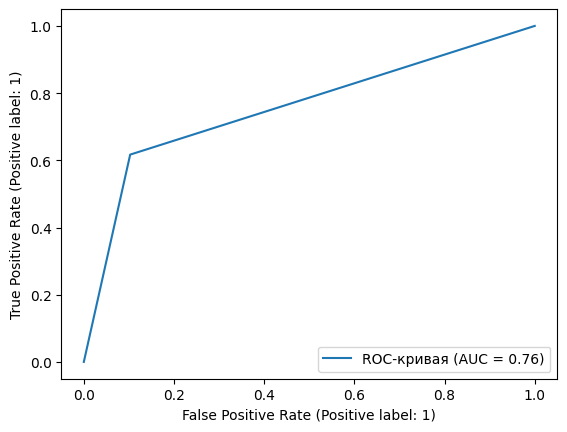

In [92]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

# KNN

In [93]:
knnRegressor.get_params()
param_grid = [
    {
        'leaf_size': [10, 15, 20], 'n_neighbors': [3, 5, 7], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    {
        'leaf_size': [10, 15, 25], 'n_neighbors': [2, 3, 4], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    } 
]
grid_search = GridSearchCV(knnRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3}

In [94]:
knnRegressor = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=3)
knnRegressor.fit(data_train, Y_train)
Y_pred = knnRegressor.predict(data_test)

file = open('models/knn.pkl', 'wb')
pickle.dump(knnRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/knnParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("KNN прогноз Y:\n", list(Y_pred[:5]))

Y:
 [0, 0, 1, 0, 1]
KNN прогноз Y:
 [0, 0, 1, 0, 0]


In [95]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[87 20]
 [24 23]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       107
           1       0.53      0.49      0.51        47

    accuracy                           0.71       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.71      0.71      0.71       154



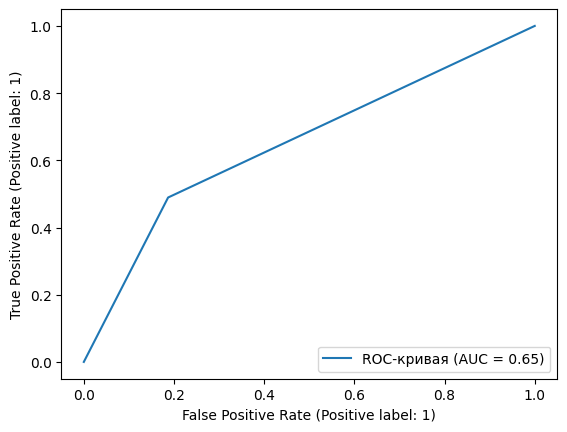

In [96]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")